# Advanced Data Structures and Algorithms
By Dr. [Uzay Cetin](https://uzay00.github.io/kahve/)

 - Course for CMPE 232 @ Bilgi University
 - Python Implementations of Graph Algorithms

Go to our Book's web site: https://algs4.cs.princeton.edu/lectures/

## Breadth For Search

![](figures/BFS_traversal.gif)


__BFS Algorithm__
```
    - Use (initally empty) queue 
    - Start from node s (Traverse s)
        - put s_name to queue
        - Mark s = Node[s_name] as visited, 
    - While queue is not empty
        - Get node s form queue 
        - for all not-visited neigbors t of s (Traverse t)
            - put t_name to queue
            - Mark t = Node[t_name] as visited, 
```

![](Figures/BFS_Diagram.png)

![](https://algs4.cs.princeton.edu/lectures/demo/42DemoBreadthFirstSearch.mov)

BFS: High level picture
 - initially all nodes are unexplored
 - To Avoid waste of time, dont explore any node twice
 - Explore nodes in layers



In [1]:
import warnings
warnings.filterwarnings('ignore')

import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class node():
    def __init__(self, name):
        self.name = name 
        self.visited = False
        self.prev = None
        self.neighbors = []   # List of references to adjacent nodes (not node names)

## Directed Graphs

![](figures/directed.png)

In [3]:
class DiGraph():
    def __init__(self, edge_list):
        self.edge_list = edge_list
        self.create_nodes()
        self.create_graph() # create edges
        
    def create_nodes(self):
        # Get node names from edge_list and remove duplicates
        self.node_names = list(set([s for s,t in self.edge_list]
                                   +[t for s,t in self.edge_list]))
        # create nodes, store in a dictionary
        self.nodes = {n:node(n) for n in self.node_names}
        
    def create_graph(self):
        for edge in self.edge_list:
            self.add_edge(edge)
            
    def add_edge(self, edge):
        s,t = edge
        self.nodes[s].neighbors.append(self.nodes[t]) # in neighbor list I have nodes (not names)
        ## UNDIRECTED: self.nodes[t].neighbors.append(self.nodes[s])

In [4]:
def draw(g, node_name = None, pos_fr = None, color = 'lightgreen', display = True):
    G = nx.DiGraph()
    G.add_edges_from(g.edge_list)
    
    if pos_fr: pos_fr = pos_fr
    else: pos_fr = nx.fruchterman_reingold_layout(G)
    
    marked = [name for name, node in g.nodes.items() if node.visited]
    non_marked = [name for name, node in g.nodes.items() if not node.visited]
    
    fig = plt.figure(figsize=(10,10))
    # Plot node labels
    nx.draw_networkx_labels(G, pos=pos_fr)
    # Plot nodes
    nx.draw_networkx_nodes(G, pos=pos_fr, nodelist=marked, 
                           node_size=600, font_size= 30, node_color='pink')
    nx.draw_networkx_nodes(G, pos=pos_fr, nodelist=non_marked, 
                           node_size=300, font_size= 30, node_color='lightblue')
    # Plot edges 
    nx.draw_networkx_edges(G, pos=pos_fr, width=2, arrowstyle='-|>')
    if node_name:  plt.savefig(f'figures/iter{node_name}.png')
    if not display: plt.close(fig)
        
    return pos_fr

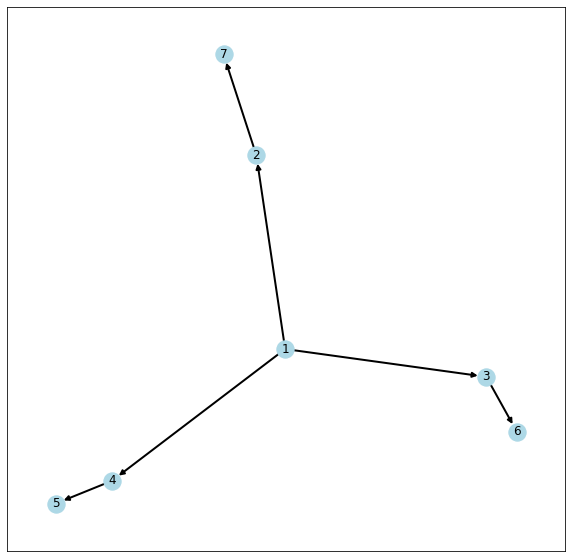

In [5]:
# list of tuples (s,t)
edge_list = [(1,2),(1,3),(1,4), (4,5), (3, 6), (2, 7)]

g = DiGraph(edge_list)
pos = draw(g)

![](https://github.com/uzay00/CMPE232/blob/master/2019/Lecture1%20-%20python%20programming%20and%20BFS%20graph%20traversal/BFS.png?raw=true)

# Breadth For Search

```
    - Use (initally empty) queue 
    - Start from node s (Traverse s)
        - put s_name to queue
        - Mark s = Node[s_name] as visited, 
    - While queue is not empty
        - Get node s form queue 
        - for all not-visited neigbors t of s (Traverse t)
            - put t_name to queue
            - Mark t = Node[t_name] as visited, 
```

In [6]:
# First In First Out Data Structure
from queue import Queue 
q = Queue()
q.put('a')
q.put('b')
q.put('c')

print("\nElements dequeued from the queue") 
print(q.get()) 


Elements dequeued from the queue
a


In [7]:
class BFS():   
    def __init__(self, G):
        self.G = G
        self.traversal = []
        self.queue = Queue()
        self.pos_fr = draw(self.G) # inital position
        
    def bfs(self, s_name):
        self.queue.put(s_name)
        self.G.nodes[s_name].visited = True
        self.traversal.append(s_name)
        draw(self.G, s_name,  pos_fr = self.pos_fr, display= False) # using same position
        
        while not self.queue.empty():
            s_name = self.queue.get() # s is node (not node name)
            for t in self.G.nodes[s_name].neighbors: 
                if not t.visited: # all unmarked neighbors
                    self.queue.put(t.name)
                    self.G.nodes[t.name].visited = True
                    self.traversal.append(t.name)
                    draw(self.G, t.name,  pos_fr = self.pos_fr, display= False) # using same position

[1, 2, 3, 4, 7, 6, 5]

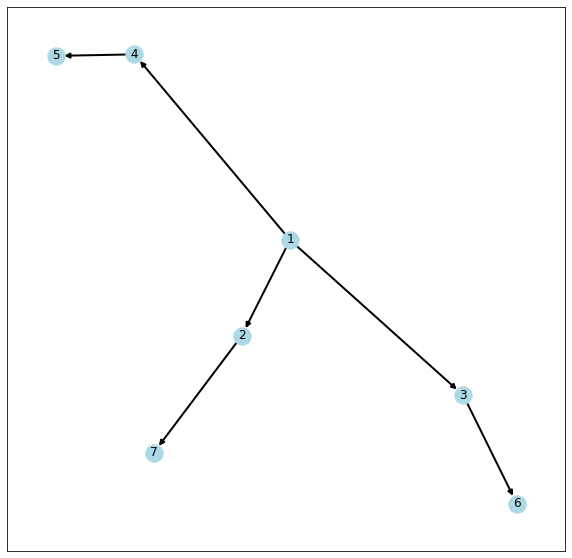

In [8]:
# list of tuples (s,t)
edge_list = [(1,2),(1,3),(1,4), (4,5), (3, 6), (2, 7)]
g = DiGraph(edge_list)
bfs = BFS(g);
bfs.bfs(s_name = 1);
bfs.traversal

In [9]:
from PIL import Image

def animate(filename = 'BFS_traversal', order = bfs.traversal):
    # Create the frames
    frames = []
    imgs = [f'figures/iter{i}.png' for i in order]
    for i in imgs:
        new_frame = Image.open(i)
        frames.append(new_frame)

    # Save into a GIF file that loops forever
    frames[0].save(f'figures/{filename}.gif', format='GIF',
                   append_images=frames[1:],
                   save_all=True,
                   duration=1000, loop=0)
    
animate('BFS_traversal', bfs.traversal)

![](figures/BFS_traversal.gif)

In [10]:
class BFS2():   
    def __init__(self, G):
        self.G = G
        self.traversal = []
        self.queue = Queue()
        self.pos_fr = draw(self.G) # inital position
     
    def traverse(self, v_name):
        self.queue.put(v_name)
        self.G.nodes[v_name].visited = True
        self.traversal.append(v_name)
        draw(self.G, v_name,  pos_fr = self.pos_fr, display= False) # using same position
        
    def bfs(self, s_name):
        self.traverse(s_name)       
        while not self.queue.empty():
            s_name = self.queue.get() # s is node (not node name)
            for t in self.G.nodes[s_name].neighbors: 
                if not t.visited: # all unmarked neighbors
                    self.traverse(t.name)
                    t.prev = s_name

[1, 2, 3, 4, 7, 6, 5]

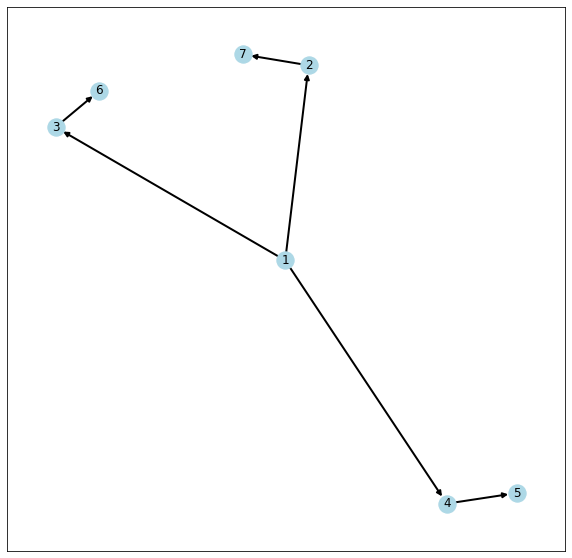

In [11]:
# list of tuples (s,t)
edge_list = [(1,2),(1,3),(1,4), (4,5), (3, 6), (2, 7)]
g = DiGraph(edge_list)
bfs = BFS2(g);
bfs.bfs(s_name = 1);
bfs.traversal

In [12]:
animate('BFS_traversal2', bfs.traversal)

![](figures/BFS_traversal2.gif)

# Applications
## Depth - First Search

In [13]:
class DFS():   
    """
    - Mark v = Node[s_name] as visited
    - recursively visit all unmarked neighbors
    """
    def __init__(self, G):
        self.G = G
        self.traversal = []
        self.pos_fr = draw(self.G) # inital position
        
    def dfs(self, s_name):
        self.G.nodes[s_name].visited = True
        self.traversal.append(s_name)
        draw(self.G, s_name,  pos_fr = self.pos_fr, display= False) # using same position
        
        for t in self.G.nodes[s_name].neighbors: # t is node (not node name)
            if not t.visited: # all unmarked neighbors
                t.prev = s_name
                self.dfs(t.name) # recursive visit

[1, 2, 7, 3, 6, 4, 5]

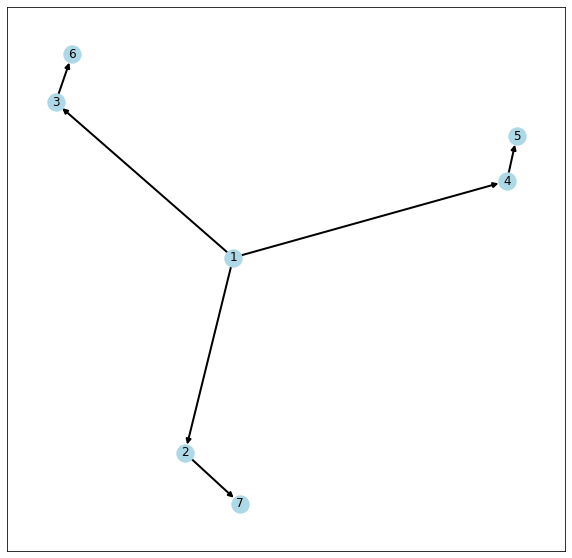

In [14]:
# list of tuples (s,t)
edge_list = [(1,2),(1,3),(1,4), (4,5), (3, 6), (2, 7)]
g = DiGraph(edge_list)
dfs = DFS(g);
dfs.dfs(s_name = 1);
dfs.traversal

In [15]:
animate('DFS_traversal', dfs.traversal)

![](figures/DFS_traversal.gif)

## Shorest Path 

 - Unweighted, directed graph

In [16]:
def getPath(source = 'A', target = 'D', G = g, verbose = False):
    prevs = {v_name: v.prev for v_name, v in G.nodes.items()}
    if verbose: print(prevs)
    node = target
    path = [node]
    while node != source:
        if verbose: 
            print(path)
            print(node)
        node = prevs[node]
        path.append(node)
    return path[::-1]

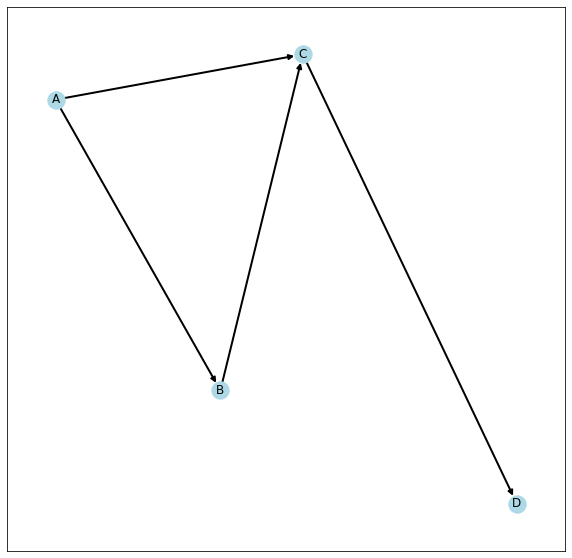

In [17]:
edge_list = [('A', 'B'), ('B', 'C'), ('C', 'D'), ('A', 'C')]
g = DiGraph(edge_list)
bfs = BFS2(g)
bfs.bfs('A')

['A', 'B', 'C', 'D']

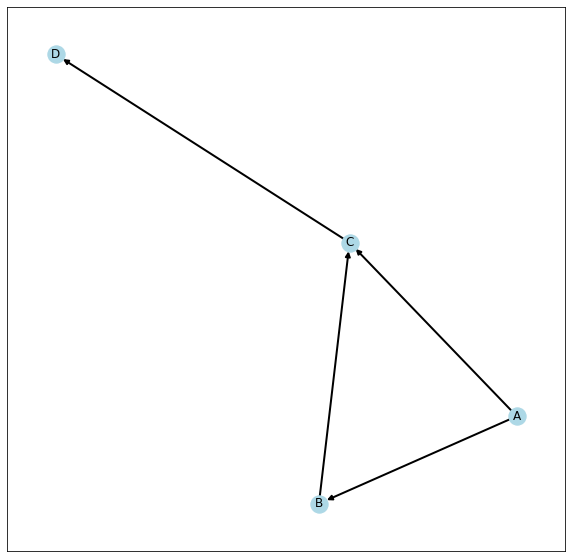

In [18]:
# list of tuples (s,t)
edge_list = [('A', 'B'), ('B', 'C'), ('C', 'D'), ('A', 'C')]
g = DiGraph(edge_list)
dfs = DFS(g);
dfs.dfs(s_name = 'A');
dfs.traversal

In [19]:
getPath(source = 'A', target = 'D', G = dfs.G) # Just one of the paths in DFS

['A', 'B', 'C', 'D']

In [20]:
getPath(source = 'A', target = 'D', G = bfs.G) # To find shortest path, use BFS

['A', 'C', 'D']

In [21]:
getPath(source = 'A', target = 'D', G = bfs.G, verbose=True) # To find shortest path, use BFS

{'D': 'C', 'C': 'A', 'B': 'A', 'A': None}
['D']
D
['D', 'C']
C


['A', 'C', 'D']

## Connected Component

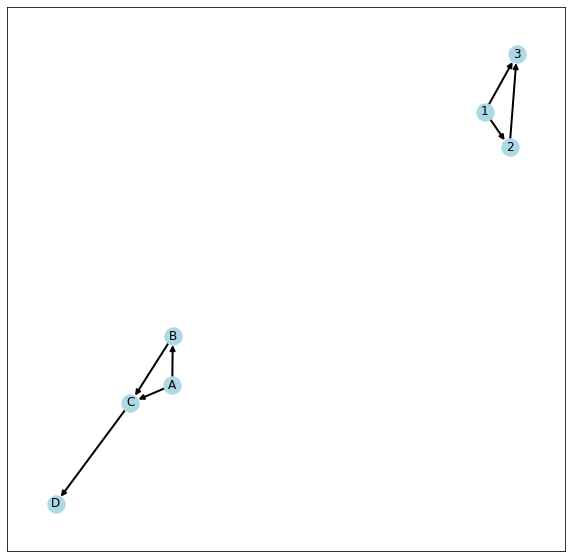

In [22]:
# list of tuples (s,t)
edge_list = [('A', 'B'), ('B', 'C'), ('C', 'D'), ('A', 'C'),  (1,2),(2,3),(1,3)]
g = DiGraph(edge_list)
dfs = DFS(g)

In [23]:
dfs.dfs(s_name = 'A')
dfs.traversal

['A', 'B', 'C', 'D']

In [24]:
dfs.dfs(s_name = 1)
dfs.traversal

['A', 'B', 'C', 'D', 1, 2, 3]